In [39]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
 
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [40]:
# Importamos el sopooporte de procesamiento de nuestro src
from src import soporte_preprocesamiento as sp

In [41]:
df = pd.read_csv("datos/api_rent_madrid.csv", sep=";", index_col=0).reset_index()


In [42]:
df.head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",...,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,...,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,...,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,...,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


Vamos a hacer un análisis exploratorio de nuestro dataFrame para familiarizarnos con las carácterísticas de nuestras varia

In [43]:
sp.exploracion_datos(df)

El número de filas es 450 y el número de columnas es 38

----------

En este conjunto de datos tenemos 8 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


description                0.222222
hasVideo                   4.000000
status                     4.000000
newDevelopment             4.000000
priceByArea                4.000000
detailedType               4.000000
suggestedTexts             4.000000
hasPlan                    4.000000
has3DTour                  4.000000
has360                     4.000000
hasStaging                 4.000000
superTopHighlight          4.000000
topNewDevelopment          4.000000
externalReference         23.333333
floor                     18.666667
district                  24.888889
neighborhood              61.333333
hasLift                    6.888889
parkingSpace              68.888889
labels                    93.333333
newDevelopmentFinished    96.222222
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
propertyCode,450.0,9.463515e+07,1.385817e+07,666696.0,97564945.50,98660320.5,98894324.25,98939685.0
numPhotos,450.0,2.190000e+01,9.670346e+00,0.0,15.00,21.0,28.00,72.0
price,450.0,6.717978e+02,8.510060e+01,340.0,640.00,700.0,740.00,750.0
size,450.0,6.823778e+01,3.566256e+01,20.0,47.25,62.0,80.00,371.0
rooms,450.0,1.700000e+00,9.700412e-01,0.0,1.00,2.0,2.00,6.0
bathrooms,450.0,1.213333e+00,4.414998e-01,1.0,1.00,1.0,1.00,3.0
distance,450.0,2.245577e+04,1.700169e+04,183.0,7104.25,20294.0,34979.75,59919.0
priceByArea,432.0,1.186343e+01,5.360971e+00,1.0,8.00,11.0,15.00,33.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,450,6,flat,356
operation,450,1,rent,450
address,450,405,"Calle Valle de Ambles, 2",10
province,450,5,Madrid,358
municipality,450,96,Madrid,170
country,450,1,es,450
latitude,450,433,404.430.651,10
longitude,450,433,-34.659.877,10
description,449,427,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,10
hasVideo,432,2,False,314



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            450 non-null    int64  
 1   numPhotos               450 non-null    int64  
 2   price                   450 non-null    float64
 3   propertyType            450 non-null    object 
 4   operation               450 non-null    object 
 5   size                    450 non-null    float64
 6   exterior                450 non-null    bool   
 7   rooms                   450 non-null    int64  
 8   bathrooms               450 non-null    int64  
 9   address                 450 non-null    object 
 10  province                450 non-null    object 
 11  municipality            450 non-null    object 
 12  country                 450 non-null    object 
 13  latitude                450 non

None

En este primer análisis exploratorio detectamos que tenemos 8 duplicados, eliminamos esas filas

In [44]:


df = df.drop_duplicates()
df = df.reset_index(drop=True)


También detectamos que hay 3 columnas con un porcentaje de nulos muy elevado . Son: "parkingSpace", "labels" "newDevelopmentFinished".

Sacamos sus valores únicos


In [45]:
valores_unicos_espacio_estacionamiento = df['parkingSpace'].unique()
valores_unicos_etiquetas = df['labels'].unique()
valores_unicos_desarrollo_terminado = df['newDevelopmentFinished'].unique()

valores_unicos = {
    'Espacio de Estacionamiento': valores_unicos_espacio_estacionamiento,
    'Etiquetas': valores_unicos_etiquetas,
    'Desarrollo Terminado': valores_unicos_desarrollo_terminado
}

print(valores_unicos)


{'Espacio de Estacionamiento': array([nan,
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}"],
      dtype=object), 'Etiquetas': array([nan, "[{'name': 'apartamentoType', 'text': 'Apartamento'}]"],
      dtype=object), 'Desarrollo Terminado': array([nan, False, True], dtype=object)}


Nos falta información para imputarlas de manera lógica así que vamos a elimarlas.

In [46]:
df = df.drop(columns=['parkingSpace', 'labels', 'newDevelopmentFinished'])



In [47]:
# Mostramos las columnas con las que nos hemos quedado

df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift'],
      dtype='object')

### Columnas numéricas.

In [48]:
visualizador =sp.Visualizador(df)

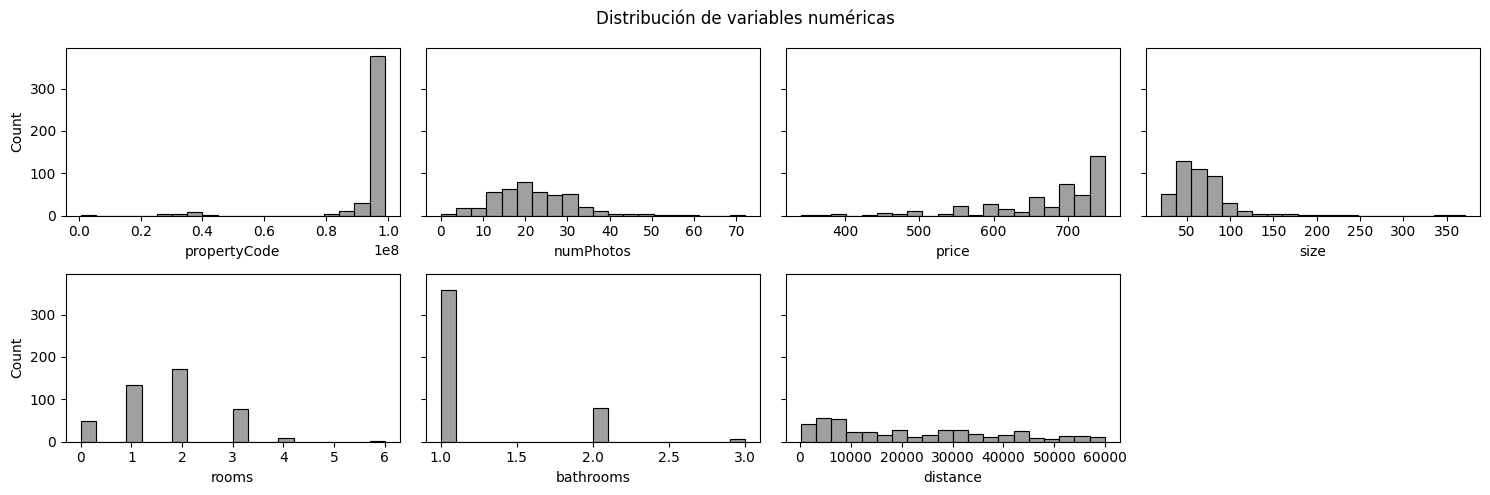

In [49]:
visualizador.plot_numericas()

In [50]:
df.describe()

,propertyCode,numPhotos,price,size,rooms,bathrooms,distance,priceByArea
count,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,424.000000
mean,9.457326e+07,21.848416,672.963801,67.959276,1.696833,1.205882,22266.393665,11.948113
std,1.397475e+07,9.655147,83.964567,35.867733,0.975174,0.437123,16991.268546,5.369307
min,6.666960e+05,0.000000,340.000000,20.000000,0.000000,1.000000,183.000000,1.000000
25%,9.755039e+07,15.000000,645.000000,46.250000,1.000000,1.000000,7089.000000,8.000000
50%,9.866265e+07,21.000000,700.000000,62.000000,2.000000,1.000000,20001.000000,11.000000
75%,9.889432e+07,28.000000,740.000000,80.000000,2.000000,1.000000,34854.750000,15.000000
max,9.893968e+07,72.000000,750.000000,371.000000,6.000000,3.000000,59919.000000,33.000000


A la vista de las gráficas y el describe anterior podemos observar que:

**propertyCode**: Funciona como un id, pero esta sesgado hasta valores muy altos, y no aporta información relevante al análisis. La eliminamos.

**numPhotos**: La mayoría de las propiedades tienen entre 15 y 30 fotos, con algunas pocas alcanzando hasta 72.
La media es de 21 fotos por propiedad, pero hay propiedades sin fotos (min = 0). Este podría ser un punto a explorar, ya que podría influir en el interés de los arrendados o el precio del alquiler

**price**: Es nuestra variable objerivo. La mayoría de los precios están entre 600 y 750 euros. El precio promedio es de 673 euros, con un rango desde 340 hasta 750 euros. La desviación estándar es baja (83.96), lo que sugiere una variación moderada en los precios de las propiedades.

**size**: La mayoría de las propiedades tienen entre 40 y 100 m², con algunas pocas siendo extremadamente grandes (hasta 371 m²).El tamaño promedio es de 68 m², con una desviación estándar de 35.87. Los valores más grandes podrían analizarse como outliers o propiedades de lujo.

**rooms** :La mayoría de las propiedades tienen entre 1 y 3 habitaciones. Existen propiedades con hasta 6 habitaciones, pero son poco comunes. La mediana es de 2 habitaciones, mientras que el promedio es de 1.7, indicando que las propiedades con más habitaciones son relativamente raras. Las propiedades con más habitaciones posdrían tratarse como outliers


